In [12]:
import urllib2
import os
from bs4 import BeautifulSoup
import re
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [8]:
os.chdir('./Downloads')

In [124]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

cve_to_date = load_obj("cve_to_bugzilla_date")
blah = {}
for key,val in cve_to_date.iteritems():
    key = key.encode('utf8')
    blah[key] = val
cve_to_date = blah


In [62]:
#year wise trend of foundational vulnerabilities
fTotal = {}
total = {}
foundation = 2
def foundationalTotal(filename,year):
    with open(filename) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            next(csvReader, None)
            #d[year] = 0
            for row in csvReader:
                cveNum = row[0].strip()
                if cveNum in cve_to_date:
                    minYear = min(year,cve_to_date[cveNum].year)
                else: 
                    minYear = year
                row[1] = row[1].strip()
                if row[1] == '' or row[1] == '-':
                    continue
                verSplit = row[1].split('.')
                if minYear in total:
                    total[minYear] += 1
                else:
                    total[minYear] = 1
                try:
                    if(int(verSplit[0]) <= foundation):
                        if minYear in fTotal:
                            fTotal[minYear] += 1
                        else:
                            fTotal[minYear] = 1
                except ValueError:
                    continue
                    
foundationalTotal("firefox2016.csv",2016)  
foundationalTotal("firefox2015.csv",2015)
foundationalTotal("firefox2014.csv",2014)
foundationalTotal("firefox2013.csv",2013)
foundationalTotal("firefox2012.csv",2012)
foundationalTotal("firefox2011.csv",2011)
foundationalTotal("firefox2010.csv",2010)
foundationalTotal("firefox2009.csv",2009)
foundationalTotal("firefox2008.csv",2008)
foundationalTotal("firefox2007.csv",2007)
foundationalTotal("firefox2006.csv",2006)
# fTotal.pop(2000)
# fTotal.pop(2005)
fTotal[2016] = 0
for year in fTotal.keys():
    if year < 2006:
        fTotal.pop(year)
for year in total.keys():
    if year < 2006:
        total.pop(year)
# total.pop(2000)
# total.pop(2002)
# total.pop(2003)
# total.pop(2004)
# total.pop(2005)
print fTotal
print total

{2016: 0, 2006: 57, 2007: 82, 2008: 78, 2009: 49, 2010: 50, 2011: 40, 2012: 128, 2013: 41, 2014: 36, 2015: 4}
{2016: 77, 2006: 58, 2007: 85, 2008: 102, 2009: 111, 2010: 93, 2011: 104, 2012: 188, 2013: 127, 2014: 123, 2015: 176}


In [63]:
totalNew = sorted(total.items())
years = []
xList = []
for k,v in totalNew:
    years.append(k)
    xList.append(v)
fTotalNew = sorted(fTotal.items())
xList2 = []
for k,v in fTotalNew:
    xList2.append(v)
print years
print xList
print xList2

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
[58, 85, 102, 111, 93, 104, 188, 127, 123, 176, 77]
[57, 82, 78, 49, 50, 40, 128, 41, 36, 4, 0]


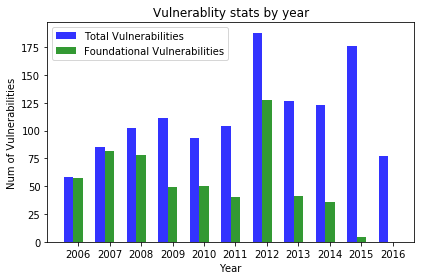

In [64]:
#plotting year vs foundational vuls
# data to plot
total = xList
fTotal = xList2
n_groups = len(total)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, total, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Total Vulnerabilities')
 
rects2 = plt.bar(index + bar_width, fTotal, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Foundational Vulnerabilities')
 
plt.xlabel('Year')
plt.ylabel('Num of Vulnerabilities')
plt.title('Vulnerablity stats by year')
plt.xticks(index + bar_width, years)
plt.legend()
 
plt.tight_layout()
plt.show()

[98, 96, 76, 44, 53, 38, 68, 32, 29, 2, 0]


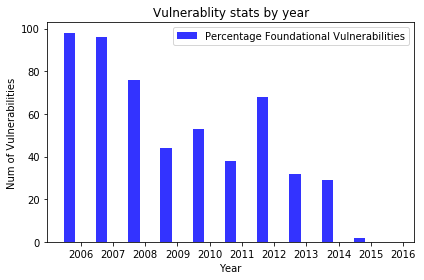

In [65]:
#plotting % foundational vuls by year
# data to plot
n_groups = len(total)
percent = []
for val1,val2 in zip(fTotal,total):
    res = (val1*100)/val2
    percent.append(res)
print percent
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, percent, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Percentage Foundational Vulnerabilities')

plt.xlabel('Year')
plt.ylabel('Num of Vulnerabilities')
plt.title('Vulnerablity stats by year')
plt.xticks(index + bar_width, years)
plt.legend()
 
plt.tight_layout()
plt.show()

In [66]:
#if period is divided in half, the trend
first = 0
second = 0
for key,val in d.iteritems():
    if key < 2011:
        first = first + val
    else:
        second = second + val
print first, second

NameError: name 'd' is not defined

In [125]:
#trying to get unique initial versions to get their release dates
v = []
def versions(filename,year):
    with open(filename) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            next(csvReader, None)
            #d[year] = 
            for row in csvReader:
                row[1] = row[1].strip()
                if row[1] == '' or row[1] == '-':
                    continue
                v.append(row[1])
versions("firefox2006.csv",2006)
versions("firefox2007.csv",2007)
versions("firefox2008.csv",2008)
versions("firefox2009.csv",2009)
versions("firefox2010.csv",2010)
versions("firefox2011.csv",2011)
versions("firefox2012.csv",2012)
versions("firefox2013.csv",2013)
versions("firefox2014.csv",2014)
versions("firefox2015.csv",2015)
versions("firefox2016.csv",2016)
temp = set(v)
temp.remove("[[datetime.datetime(2011, 1, 6, 17, 44), datetime.datetime(2011, 1, 6, 17, 46), u'Canvas: WebGL', []]]")
v = list(temp)
print v
print(len(v))

['7.0', '12.0', '6.0', '37.0', '28.0.1', '10.0', '43.0', '3.0.10', '16.0', '3.0.19', '43.0.1', '43.0.4', '3.5.2', '3.5.1', '38.1.0', '40.0.2', '40.0.3', '45.0.2', '45.0.1', '3.0.6', '3.0.7', '3.0.4', '1.5.0.12', '3.0.2', '3.0.3', '3.0.1', '3.0.9', '3.6', '3.5', '3.6.27', '3.0', '3.1', '2.0', '34.0.5', '2.0.0.12', '2.0.0.11', '2.0.0.14', '2.0.0.9', '2.0.0.8', '2.0.0.7', '2.0.0.6', '2.0.0.5', '2.0.0.4', '2.0.0.3', '2.0.0.1', '48.0.2', '27.0', '29.0.1', '37.0.1', '37.0.2', '1.5.0.10', '3.6.1', '3.6.2', '3.6.3', '3.6.7', '32.0', '33.0', '0.8', '42.0', '3.0.5', '19.0', '39.0', '8.0', '2', '30.0', '3.5.10', '41.0', '1.5.0.4', '1.5.0.7', '1.5.0.6', '1.5.0.1', '28.0', '41.0.2', '41.0.1', '1.5.0.9', '1.5.0.8', '47.0.1', '1.5', '1.0', '2.0 8', '0.1', '0.2', '1.8', '38.0', '39.0.3', '36.0.1', '36.0.3', '44.0.2', '36.0.4', '44.0.1', '4.0', '3.0beta5', '46.0.1']
93


In [126]:
dates = ['2011-09-27','2012-04-24','2011-08-16','2015-03-31','2014-03-24','2012-01-31','2015-12-15','2009-04-27','2012-10-09','2010-03-30','2015-12-18', 
        '2016-01-06','2009-08-03','2009-07-16','2015-07-02','2015-08-13','2015-08-27','2016-04-11','2016-03-16','2009-02-03',
        '2009-03-04','2008-11-12','2007-05-30','2008-09-23','2008-09-26','2008-07-16','2009-04-21','2010-01-21','2009-06-30',
        '2012-02-17','2008-06-17','2008-07-28','2006-10-24','2014-12-1','2008-02-07','2007-11-30','2008-04-16','2007-11-01',
        '2007-10-18','2007-09-18', '2007-07-30', '2007-07-17', '2007-04-30', '2007-03-20', '2006-12-19', '2016-08-24', 
         '2014-02-04', '2014-05-09', '2015-04-03','2015-04-20', '2007-02-23', '2010-01-21', '2010-03-22', '2010-04-01',
         '2010-07-20', '2014-09-02', '2014-10-14', '2004-02-09', '2015-11-03', '2008-12-16', '2013-02-19', '2015-07-02',
         '2011-11-08', '2006-10-24', '2014-06-10', '2010-06-22', '2015-09-22', '2006-06-01', '2006-09-14', '2006-08-02',
         '2006-02-01', '2014-03-18', '2015-10-15', '2015-09-30', '2006-12-19', '2006-11-07', '2016-06-28', '2005-11-29', 
         '2004-11-09', '2006-10-24', '2002-09-23', '2002-10-01', '2007-04-30', '2015-04-12', '2015-08-06', '2015-03-05', 
         '2015-03-20', '2016-02-11', '2015-03-21', '2016-02-08', '2011-03-22', '2008-04-02', '2016-04-03']
print(len(dates))

93


In [139]:
versionDict = {}
for key,value in zip(v,dates):
    value = datetime.strptime(value, '%Y-%m-%d')
    versionDict[key] = value 


In [128]:
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol=2)

save_obj(versionDict, "versiondict")

In [129]:
len(temp)

93

In [130]:
#maps CVEs to their initial versions
cveDict = {}
def cveCreator(filename,year):
    with open(filename) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            next(csvReader, None)
            #d[year] = (0,0)
            for row in csvReader:
                row[1] = row[1].strip()
                row[0] = row[0].strip()
                #print row[0]
                cveDict[row[0]] = row[1]
cveCreator("firefox2006.csv",2006)
cveCreator("firefox2007.csv",2007)
cveCreator("firefox2008.csv",2008)
cveCreator("firefox2009.csv",2009)
cveCreator("firefox2010.csv",2010)
cveCreator("firefox2011.csv",2011)
cveCreator("firefox2012.csv",2012)
cveCreator("firefox2013.csv",2013)
cveCreator("firefox2014.csv",2014)
cveCreator("firefox2015.csv",2015)
cveCreator("firefox2016.csv",2016)                

In [150]:
#mean time to report vulnerabilites
dateDiffDict = {}
for key,value in cve_to_date.iteritems():
    key = key.encode('utf8')
    if key in cveDict:
        earlyVersion = cveDict[key]
        if earlyVersion in versionDict:
            releaseDateOfVersion = versionDict[earlyVersion]
            difference = ((value - releaseDateOfVersion).total_seconds())/(24*3600)
            if difference < 0:
                difference = 0
            
            if('3.5' in earlyVersion):
                earlyVersion = 3.5
            elif '3.6' in earlyVersion:
                earlyVersion = 3.6
            else:
                earlyVersion = int(earlyVersion.split('.')[0])
            
            if earlyVersion < foundation:
                earlyVersion = foundation
            #earlyVersion = earlyVersion.split('.')[0]
            if earlyVersion in dateDiffDict:
                dateDiffDict[earlyVersion].append(int(difference))
            else:
                dateDiffDict[earlyVersion] = [int(difference)]
                
for key,value in dateDiffDict.iteritems():
    dateDiffDict[key] = sorted(value)

dateDiffMean = {}
for key,value in dateDiffDict.iteritems():
    dateDiffMean[key] = int((np.mean(value)))

# dateDiffMean[1] = round(((dateDiffMean[0] + dateDiffMean[1])/2),0)
# dateDiffMean.pop(0)
print dateDiffMean

{3.5: 187, 2: 2535, 3: 215, 4: 252, 6: 0, 7: 0, 8: 28, 10: 4, 12: 4, 16: 1, 19: 75, 27: 0, 28: 0, 29: 0, 30: 26, 32: 6, 33: 3, 34: 4, 36: 0, 37: 0, 38: 1, 39: 0, 40: 0, 41: 1, 42: 2, 43: 1, 44: 1, 45: 0, 46: 7, 47: 1, 48: 1, 3.6: 194}


[2, 3, 3.5, 3.6, 4, 6, 7, 8, 10, 12, 16, 19, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[2535, 215, 187, 194, 252, 0, 0, 28, 4, 4, 1, 75, 0, 0, 0, 26, 6, 3, 4, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 7, 1, 1]


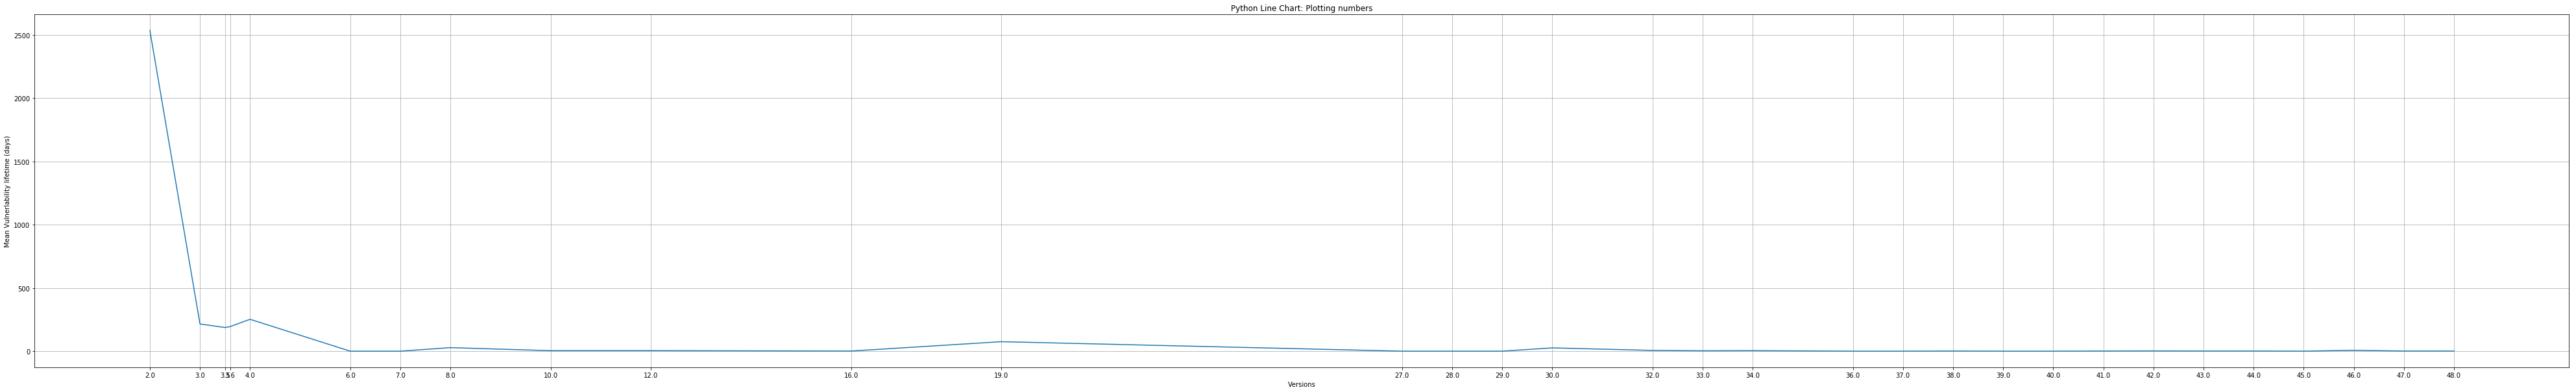

In [154]:
#Plot for mean lifetime of vulerabilities
#from pylab import *
t = []
s = []
dateDiffMeanNew = sorted(dateDiffMean.items())
for k,v in dateDiffMeanNew:
    t.append(k)
    s.append(v)
#t = dateDiffMean.keys()
#s = dateDiffMean.values()
print t
print s
plt.figure(figsize=(70,10))
plt.plot(t, s)
 
plt.xlabel('Versions')
plt.ylabel('Mean Vulnerlability lifetime (days)')
plt.title('Python Line Chart: Plotting numbers')
plt.grid(True)
plt.xticks(t)
plt.show()

In [161]:
d2 = {}
p = 0
def versionWiseTotal(filename):
    with open(filename) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            next(csvReader, None)
            for row in csvReader:
                try:
                    row[1] = row[1].strip()
                    row[2] = row[2].strip()
                    if row[1] == '' or row[1] == '-' or row[2] == '' or row[2] == '-':
                        continue
                    if('3.5' in row[1]):
                        startVerSplit = 3.5
                    elif '3.6' in row[1]:
                        startVerSplit = 3.6
                    else:
                        startVerSplit = int(row[1].split('.')[0])
                        
                    endVerSplit = int(row[2].split('.')[0])+1
                    #print row[1]
                    if startVerSplit < foundation:
                        startVerSplit = foundation
                    if endVerSplit < foundation:
                        endVerSplit = foundation
                    if (startVerSplit,endVerSplit) in d2:
                        d2[(startVerSplit,endVerSplit)] += 1
                    else:
                        d2[(startVerSplit,endVerSplit)] = 1
                    p+=1
                except Exception:
                    continue

files = ['firefox2016.csv','firefox2015.csv', 'firefox2014.csv', 'firefox2013.csv', 'firefox2012.csv', 
         'firefox2011.csv', 'firefox2010.csv', 'firefox2009.csv', 'firefox2008.csv', 'firefox2007.csv', 
         'firefox2006.csv']

for file in files:
    versionWiseTotal(file)
    
d2

{(2, 2): 34,
 (2, 3): 123,
 (2, 4): 172,
 (2, 5): 10,
 (2, 6): 1,
 (2, 7): 1,
 (2, 8): 5,
 (2, 9): 1,
 (2, 10): 7,
 (2, 13): 1,
 (2, 15): 32,
 (2, 16): 25,
 (2, 17): 35,
 (2, 18): 27,
 (2, 19): 14,
 (2, 20): 1,
 (2, 26): 13,
 (2, 27): 15,
 (2, 28): 19,
 (2, 29): 13,
 (2, 36): 18,
 (3, 4): 62,
 (3.5, 4): 49,
 (3.5, 5): 4,
 (3.6, 4): 26,
 (3.6, 5): 1,
 (3.6, 6): 1,
 (3.6, 7): 7,
 (3.6, 11): 4,
 (4, 5): 7,
 (4, 6): 9,
 (4, 7): 3,
 (4, 8): 2,
 (4, 9): 4,
 (4, 10): 10,
 (4, 12): 12,
 (4, 13): 9,
 (4, 14): 19,
 (6, 7): 1,
 (7, 8): 2,
 (8, 9): 2,
 (10, 11): 1,
 (12, 13): 2,
 (16, 17): 1,
 (19, 20): 13,
 (19, 21): 14,
 (19, 22): 17,
 (19, 23): 15,
 (19, 24): 19,
 (19, 25): 14,
 (19, 26): 1,
 (27, 28): 1,
 (28, 29): 3,
 (29, 30): 10,
 (30, 31): 14,
 (30, 32): 8,
 (30, 33): 12,
 (32, 33): 1,
 (33, 34): 11,
 (34, 35): 10,
 (36, 37): 18,
 (37, 38): 18,
 (38, 39): 19,
 (39, 40): 20,
 (40, 41): 30,
 (41, 42): 24,
 (41, 43): 1,
 (42, 43): 21,
 (43, 44): 18,
 (44, 45): 42,
 (45, 46): 13,
 (46, 47): 14

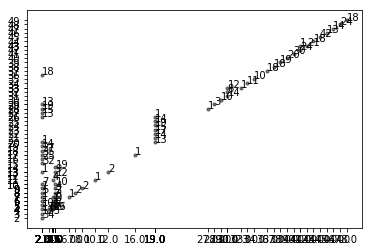

In [162]:
x = []
y = []
count = []
for key,val in d2.iteritems():
    x.append(key[0])
    y.append(key[1])
    count.append(val)

colors = (0,0,0)
area = np.pi*3
 
# Plot
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#plt.title('Scatter plot pythonspot.com')
#plt.xticks(x)
#plt.yticks(y)
#plt.xlabel('x')
#plt.ylabel('y')

fig, ax = plt.subplots()
ax.scatter(x, y, s=area, c=colors, alpha=0.5)

for i, txt in enumerate(count):
    ax.annotate(txt, (x[i],y[i]))
#fig.figure(figsize=(50,70))
plt.xticks(x)
plt.yticks(y)

plt.show()

In [132]:
#failed attempt at finding duration of fixing
d3 = {}
def durationB(filename):
    #print "woof"
    with open(filename) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            next(csvReader, None)
            #d[year] = 0
            for row in csvReader:
                #try:
                bugs = row[3].replace('[','').split('],')
                #lists = [map(int, s.replace(']','').split(',')) for s in bugs]
                print bugs
                    #print type(bugs)
                    
                #except Exception, e:
                    #print Exception
                    #continue
files = ['firefox2016.csv','firefox2015.csv', 'firefox2014.csv', 'firefox2013.csv', 'firefox2012.csv',
         'firefox2011.csv', 'firefox2010.csv', 'firefox2009.csv', 'firefox2008.csv', 'firefox2007.csv', 
         'firefox2006.csv']

for file in files:
   durationB(file)

In [163]:
#years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
#lineOfCode = [2.989, 3.179, 4.212, 4.686, 5.405, 6.008, 7.779, 9.505, 11.394, 13.110]
version = [2,3,3.5,3.6,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,
           30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]
vuls = [2.97,3.941,4.294,4.686,5.474,5.396,5.518,5.535,5.729,5.964,6.008,6.424,6.444,7.179,7.179,7.331,7.659,7.665,
        7.779,7.936,8.388,8.413,8.520,8.743,8.882,9.119,9.423,9.505,9.721,9.839,10.368,10.517,11.129,
       11.192,11.302,11.394,11.479,11.591,11.785,12.092,12.241,12.588,12.879,12.958,13.110,13.2,13.35,
        13.873,13.949,13.98]
print len(vuls)
print len(version)

50
50


In [164]:
alltered_code = []
for i in range(len(vuls)):
    if i == 0:
        alltered_code.append(vuls[i])
    else:
        alltered_code.append(round(abs(vuls[i] - vuls[i-1]),2))

codeSize = {}
for x in zip(version, alltered_code):
    codeSize[x[0]] = x[1]
codeSize

{2: 2.97,
 3: 0.97,
 3.5: 0.35,
 3.6: 0.39,
 4: 0.79,
 5: 0.08,
 6: 0.12,
 7: 0.02,
 8: 0.19,
 9: 0.24,
 10: 0.04,
 11: 0.42,
 12: 0.02,
 13: 0.74,
 14: 0.0,
 15: 0.15,
 16: 0.33,
 17: 0.01,
 18: 0.11,
 19: 0.16,
 20: 0.45,
 21: 0.03,
 22: 0.11,
 23: 0.22,
 24: 0.14,
 25: 0.24,
 26: 0.3,
 27: 0.08,
 28: 0.22,
 29: 0.12,
 30: 0.53,
 31: 0.15,
 32: 0.61,
 33: 0.06,
 34: 0.11,
 35: 0.09,
 36: 0.08,
 37: 0.11,
 38: 0.19,
 39: 0.31,
 40: 0.15,
 41: 0.35,
 42: 0.29,
 43: 0.08,
 44: 0.15,
 45: 0.09,
 46: 0.15,
 47: 0.52,
 48: 0.08,
 49: 0.03}

In [172]:
d2
versionWiseVul = {}
for key,val in d2.iteritems():
    x,y = key
    if x in versionWiseVul:
        versionWiseVul[x] += val
    else:
        versionWiseVul[x] = val
for ver in version:
    if ver not in versionWiseVul:
        versionWiseVul[ver] = 0
versionWiseVul
#versionWiseVul[2] += versionWiseVul[1]
#versionWiseVul.pop(1)
versionWiseVul

{2: 567,
 3: 62,
 3.5: 53,
 3.6: 39,
 4: 75,
 5: 0,
 6: 1,
 7: 2,
 8: 2,
 9: 0,
 10: 1,
 11: 0,
 12: 2,
 13: 0,
 14: 0,
 15: 0,
 16: 1,
 17: 0,
 18: 0,
 19: 93,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 1,
 28: 3,
 29: 10,
 30: 34,
 31: 0,
 32: 1,
 33: 11,
 34: 10,
 35: 0,
 36: 18,
 37: 18,
 38: 19,
 39: 20,
 40: 30,
 41: 25,
 42: 21,
 43: 18,
 44: 42,
 45: 13,
 46: 14,
 47: 24,
 48: 18,
 49: 0}

In [173]:
display_mloc = []
for key, value in versionWiseVul.items():
    if codeSize[key] == 0.0:
        val = 0.0
    else:
        val = round(value/codeSize[key], 3)
    display_mloc.append((key, value, codeSize[key], val))
    
sorted(display_mloc, key=lambda x: x[0])

[(2, 567, 2.97, 190.909),
 (3, 62, 0.97, 63.918),
 (3.5, 53, 0.35, 151.429),
 (3.6, 39, 0.39, 100.0),
 (4, 75, 0.79, 94.937),
 (5, 0, 0.08, 0.0),
 (6, 1, 0.12, 8.333),
 (7, 2, 0.02, 100.0),
 (8, 2, 0.19, 10.526),
 (9, 0, 0.24, 0.0),
 (10, 1, 0.04, 25.0),
 (11, 0, 0.42, 0.0),
 (12, 2, 0.02, 100.0),
 (13, 0, 0.74, 0.0),
 (14, 0, 0.0, 0.0),
 (15, 0, 0.15, 0.0),
 (16, 1, 0.33, 3.03),
 (17, 0, 0.01, 0.0),
 (18, 0, 0.11, 0.0),
 (19, 93, 0.16, 581.25),
 (20, 0, 0.45, 0.0),
 (21, 0, 0.03, 0.0),
 (22, 0, 0.11, 0.0),
 (23, 0, 0.22, 0.0),
 (24, 0, 0.14, 0.0),
 (25, 0, 0.24, 0.0),
 (26, 0, 0.3, 0.0),
 (27, 1, 0.08, 12.5),
 (28, 3, 0.22, 13.636),
 (29, 10, 0.12, 83.333),
 (30, 34, 0.53, 64.151),
 (31, 0, 0.15, 0.0),
 (32, 1, 0.61, 1.639),
 (33, 11, 0.06, 183.333),
 (34, 10, 0.11, 90.909),
 (35, 0, 0.09, 0.0),
 (36, 18, 0.08, 225.0),
 (37, 18, 0.11, 163.636),
 (38, 19, 0.19, 100.0),
 (39, 20, 0.31, 64.516),
 (40, 30, 0.15, 200.0),
 (41, 25, 0.35, 71.429),
 (42, 21, 0.29, 72.414),
 (43, 18, 0.08, 225

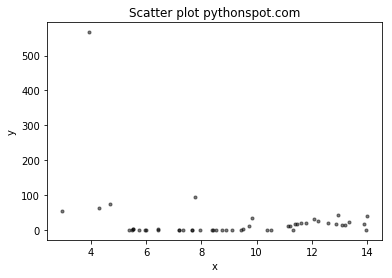

In [174]:
x = vuls
y = versionWiseVul.values()
colors = (0,0,0)
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [171]:
print len(vuls)
print len(versionWiseVul)

50
32
